In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
#load dataset
loan = pd.read_csv("E:\\loan_data.csv")

In [3]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.shape

(614, 13)

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [8]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
loan.duplicated().sum()

0

In [10]:
#drop 2 columns loan_Id and dependants
loan.drop(["Loan_ID" ,"Dependents"] , axis=1 , inplace = True)

In [11]:
loan.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
##fill the missing values (mode)
loan["Gender"].fillna(loan.Gender.mode().iloc[0] , inplace = True)
loan["Married"].fillna(loan.Married.mode().iloc[0] , inplace = True)
loan["Self_Employed"].fillna(loan.Self_Employed.mode().iloc[0] , inplace = True)
loan["Credit_History"].fillna(loan.Credit_History.mode().iloc[0] , inplace = True)

In [13]:
##fill the missing values (mean)
loan["LoanAmount"].fillna(loan.LoanAmount.mean(), inplace = True)
loan["Loan_Amount_Term"].fillna(loan.Loan_Amount_Term.mean(), inplace = True)

In [14]:
loan.isnull().sum()

Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
loan.shape

(614, 11)

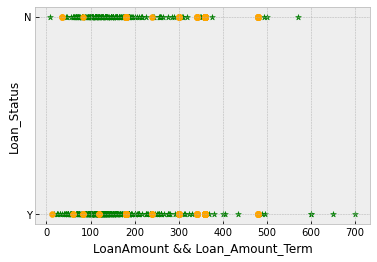

In [16]:
plt.style.use('bmh')
a = loan['LoanAmount']
b = loan['Loan_Status']
a1 = loan['Loan_Amount_Term']
plt.xlabel('LoanAmount && Loan_Amount_Term')
plt.ylabel('Loan_Status')
plt.scatter(a,b , c = 'green' , marker ='*')
plt.scatter(a1 , b , c = 'orange')
plt.show()

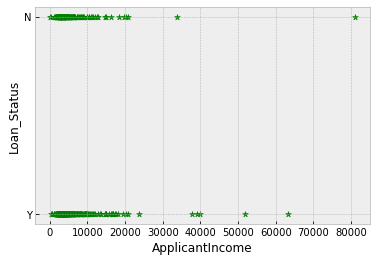

In [17]:
r = loan['ApplicantIncome']
p = loan['Loan_Status']
r1 = loan['CoapplicantIncome']
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Status')
plt.scatter(r,p , c = 'green' , marker ='*')
plt.show()

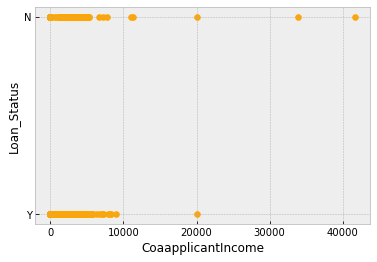

In [18]:
plt.xlabel('CoaapplicantIncome')
plt.ylabel('Loan_Status')
plt.scatter(r1 , b , c = 'orange')
plt.show()

In [19]:
#labelEncoder
cols = ["Gender" , "Married", "Education" , "Self_Employed" , "Property_Area" , "Loan_Status"]
le = LabelEncoder()
for col in cols:
  loan[col] = le.fit_transform(loan[col])

In [20]:
loan.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


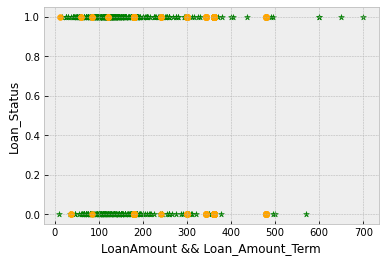

In [21]:
a = loan['LoanAmount']
b = loan['Loan_Status']
a1 = loan['Loan_Amount_Term']
b = loan['Loan_Status']
plt.xlabel('LoanAmount && Loan_Amount_Term')
plt.ylabel('Loan_Status')
plt.scatter(a,b , c = 'green' , marker ='*')
plt.scatter(a1 , b , c = 'orange')
plt.show()

Text(0, 0.5, 'Loan_Status')

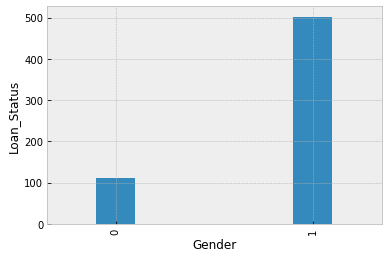

In [22]:
plt = loan.Gender.value_counts().sort_index().plot(kind ="bar" , width = 0.2)
plt.set_xlabel("Gender")
plt.set_ylabel("Loan_Status")

Text(0, 0.5, 'Loan_Status')

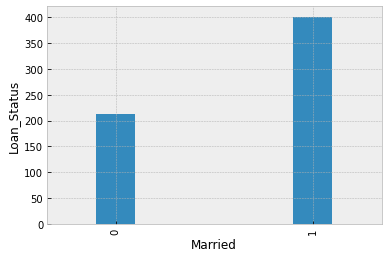

In [23]:
plt = loan.Married.value_counts().sort_index().plot(kind ="bar" , width = 0.2)
plt.set_xlabel("Married")
plt.set_ylabel("Loan_Status")

In [24]:
#scale data by MinMaxScaler 
y = loan["Loan_Status"]
x = loan.drop(["Loan_Status"] , axis = 1)
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)

In [25]:
# split data into training and testing 

x_train , x_test , y_train, y_test = train_test_split(x , y , test_size = 0.3 , random_state= 45)
print (x_train.shape)

(429, 10)


In [26]:
# model of Logistic Regression
logistic = LogisticRegression()

logistic.fit(x_train, y_train)
logistic.predict(x_test)
print("Logistic Regression Accuracy: ", logistic.score(x_test,y_test))

Logistic Regression Accuracy:  0.7783783783783784


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
## model of Decision tree 
decision = DecisionTreeClassifier()
decision.fit(x_train , y_train)

predictions = decision.predict(x_test)
print("Decision Tree Accuracy: ", decision.score(x_test,y_test))

Decision Tree Accuracy:  0.745945945945946


In [28]:
#model of SVM
svmmodel = SVC(kernel='linear',C=0.1, gamma = 'auto')
svmmodel.fit(x_train, y_train)

predictions = svmmodel.predict(x_test)
print("SVM Accuracy: ", svmmodel.score(x_test,y_test))

SVM Accuracy:  0.772972972972973
